**ACQUIRING ENERGY DEMAND DATA IN NEW YORK, USA**

---


This Data was collected from https://www.eia.gov/ through their open data API.

*EIA - Energy Information Administration*

The U.S. Energy Information Administration (EIA) is a principal agency of the U.S. Federal Statistical System responsible for collecting, analyzing, and disseminating energy information to promote sound policymaking, efficient markets, and public understanding of energy and its interaction with the economy and the environment. EIA programs cover data on coal, petroleum, natural gas, electric, renewable and nuclear energy. EIA is part of the U.S. Department of Energy.



---


The Data is sourced from Demand Readings of New York Independent System Operator (NYIS), hourly - local time.



---



##**Importing Dependencies**

In [2]:
import requests
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta
import matplotlib.ticker as ticker


##**Accessing API KEY and storing in .json format**

In [141]:
# api_key = 'VXlmsjapOoINo20fBD77cuYeQqXOhVq8jgcBxzB5'

Names = ['Demand']

PADD_KEY = ['EBA.NYIS-ALL.D.HL']


In [142]:
#Pull Data from Pad key

for i in range(len(PADD_KEY)):
  url = 'https://api.eia.gov/series/?api_key=' + api_key + '&series_id=' + PADD_KEY[i]

  r = requests.get(url)
  json_data = r.json()
  print(r)
  print(json_data)

  if r.status_code == 200:
    print('Success!')

  else:
    print('Error')

 

<Response [200]>
{'request': {'command': 'series', 'series_id': 'EBA.NYIS-ALL.D.HL'}, 'series': [{'series_id': 'EBA.NYIS-ALL.D.HL', 'name': 'Demand for New York Independent System Operator (NYIS), hourly - local time', 'units': 'megawatthours', 'f': 'HL', 'description': 'Timestamps follow the ISO8601 standard (https://en.wikipedia.org/wiki/ISO_8601). Hourly representations are provided in local time for the balancing authority or region.', 'start': '20150701T01-04', 'end': '20220305T14-05', 'updated': '2022-03-05T14:47:04-0500', 'data': [['20220305T14-05', 15973], ['20220305T13-05', 16126], ['20220305T12-05', 16302], ['20220305T11-05', 16631], ['20220305T10-05', 16878], ['20220305T09-05', 16925], ['20220305T08-05', 16792], ['20220305T07-05', 16402], ['20220305T06-05', 15945], ['20220305T05-05', 15623], ['20220305T04-05', 15541], ['20220305T03-05', 15643], ['20220305T02-05', 15889], ['20220305T01-05', 16266], ['20220305T00-05', 16967], ['20220304T23-05', 17797], ['20220304T22-05', 18612

##**Creating DataFrames**

In [143]:
df = pd.DataFrame(json_data.get('series')[0].get('data'), columns = ['Date', Names[i]])
df 

,Date,Demand
0,20220305T14-05,15973
1,20220305T13-05,16126
2,20220305T12-05,16302
3,20220305T11-05,16631
4,20220305T10-05,16878
...,...,...
58546,20150701T05-04,15304
58547,20150701T04-04,15283
58548,20150701T03-04,15541
58549,20150701T02-04,16027


###Modifying Dataframe



> Converting Hourly-Data to Daily-Data




In [144]:
df['Date']  = df['Date'].astype(str).str[:8]


In [145]:
df['Date']= pd.to_datetime(df['Date'])


In [146]:
df.rename(columns={'Date': 'Date(YMD)'},
          inplace=True, errors='raise')

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58551 entries, 0 to 58550
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date(YMD)  58551 non-null  datetime64[ns]
 1   Demand     58551 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 915.0 KB


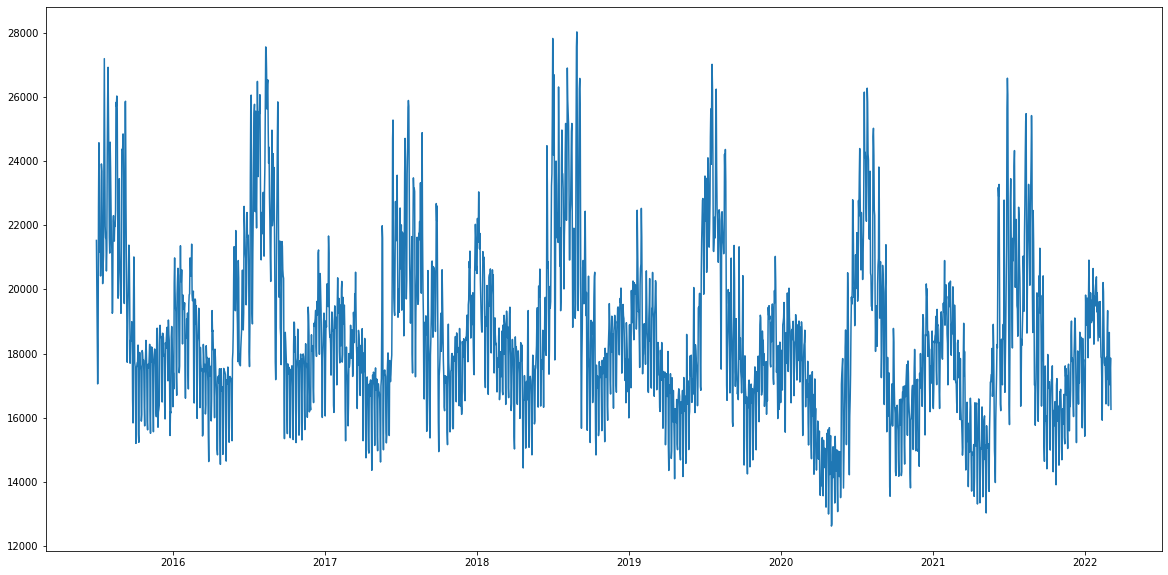

In [148]:
df1 = df.groupby(['Date(YMD)']).median()
plt.figure(figsize=(20,10))
plt.plot(df1)

In [149]:
df = df.groupby(['Date(YMD)']).mean()

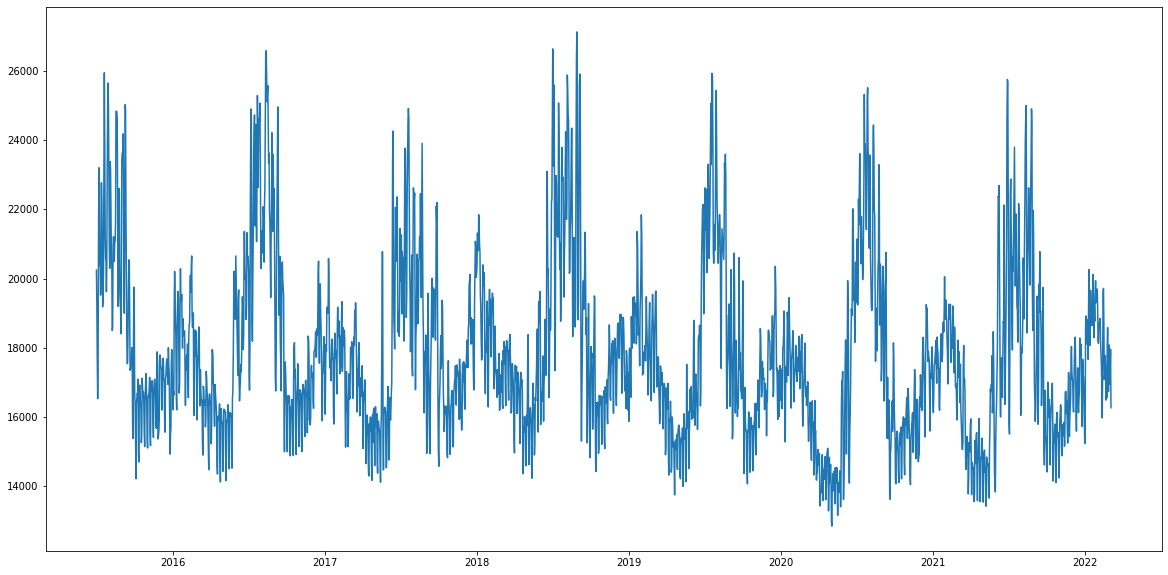

In [150]:
plt.figure(figsize=(20,10))
plt.plot(df)

Since mean and median plots are almost similar, I decide to choose the mean data.

#**Saving Dataframe in csv format**

In [154]:
df.to_csv("DailyEnergyDemandData.csv")

#Extracting Monthly and Yearly Data

Yearly 


---



In [123]:
data = pd.read_csv('/content/DailyEnergyDemandData.csv')

In [124]:
data.head()

,Date(YMD),Demand
0,2015-07-01,20243.695652
1,2015-07-02,19275.000000
2,2015-07-03,17682.333333
3,2015-07-04,16523.833333
4,2015-07-05,17620.083333


In [125]:
data['Date(YMD)'] = pd.to_datetime(data['Date(YMD)'])

In [126]:
df = data.groupby(data['Date(YMD)'].dt.year).mean()


In [127]:
df = df['Demand'].astype(int)


In [39]:
df.to_csv("YearlyEnergyDemandData.csv")


In [137]:
df = df[df.index != 2022]
df.to_csv("YearlyEnergyDemandData_Training.csv")


In [136]:
df = df[df.index == 2022]
df.to_csv("YearlyEnergyDemandData_Validation.csv")

Monthly


---



In [115]:
data

,Date(YMD),Demand
0,2015-07-01,20243.695652
1,2015-07-02,19275.000000
2,2015-07-03,17682.333333
3,2015-07-04,16523.833333
4,2015-07-05,17620.083333
...,...,...
2435,2022-03-01,18069.500000
2436,2022-03-02,16941.916667
2437,2022-03-03,17313.708333
2438,2022-03-04,17953.041667


In [116]:
df1 = data.copy()
df1['Date(YMD)'] =df1['Date(YMD)'].astype(str).str[:-3]
df1['Date(YMD)'] = pd.to_datetime(df1['Date(YMD)'])
df1 = df1.groupby(df1['Date(YMD)']).mean()


In [117]:
df1.to_csv("MonthlyEnergyDemandData.csv")

In [118]:
df1 = df1[df1.index.year != 2022]

df1

,Demand
Date(YMD),
2015-07-01,21312.650129
2015-08-01,21300.494624
2015-09-01,19707.818056
2015-10-01,16206.618280
2015-11-01,16459.000833
...,...
2021-08-01,21014.764785
2021-09-01,17495.751389
2021-10-01,15530.072581


In [119]:
df1.to_csv("MonthlyEnergyDemandData_training.csv")

In [121]:
df1 = df1[df1.index.year != 2015]
df1.to_csv("MonthlyEnergyDemandData_training2.csv")


In [120]:
df1 = df1[df1.index.year == 2022]
df1.to_csv("MonthlyEnergyDemandData_validation.csv")

#Plotting a Heatmap

In [75]:
df1 = pd.pivot_table(df1, values='Demand', index=['month'],columns=['year'], aggfunc=np.mean)


In [76]:
df1.drop([2015, 2022], axis = 1, inplace = True)

In [77]:
df1

year,2016,2017,2018,2019,2020,2021
month,,,,,,
1,18308.025538,17956.129032,19241.451613,18714.274194,17638.275538,17771.639785
2,18182.353448,17422.724702,17767.808036,18161.616071,17368.701149,18080.562500
3,16565.966924,17493.143233,17279.794238,17159.097242,15638.709327,16038.241526
4,16041.648611,15675.202778,16267.234722,15457.745833,14334.100000,14736.997222
5,16544.186828,15966.966398,16526.583333,15525.858871,14372.384409,15208.821237
6,19009.213889,18892.472222,18541.343056,17889.886111,17946.008333,19090.951389
7,22154.494624,20718.139785,22039.284946,22474.442204,22093.116935,20119.805108
8,22814.431452,19874.069892,22384.809140,20300.081989,20376.379032,21014.764785
9,19102.438889,18225.358333,19081.820833,17479.636111,16988.606944,17495.751389
